<a href="https://colab.research.google.com/github/Anastasia-Makarova/DATA_homeworks/blob/main/HW06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATA_2D**

**Load & info**

In [59]:
data_2d = pd.read_csv('/content/drive/My Drive/DATA homeworks/06/data/data_2d.csv', header=None, names=['col_1', 'col_2', 'col_3'])

In [60]:
data_2d.shape

(200, 3)

In [61]:
data_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   200 non-null    float64
 1   col_2   200 non-null    float64
 2   col_3   200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [62]:
data_2d.describe()

,col_1,col_2,col_3
count,200.000000,200.000000,200.000000
mean,0.500000,1.758886,2.211502
std,0.501255,1.239986,1.605176
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.874456,0.955211
50%,0.500000,1.729753,2.282891
75%,1.000000,2.701499,3.602253
max,1.000000,4.554605,5.722027


In [63]:
data_2d.head()

,col_1,col_2,col_3
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


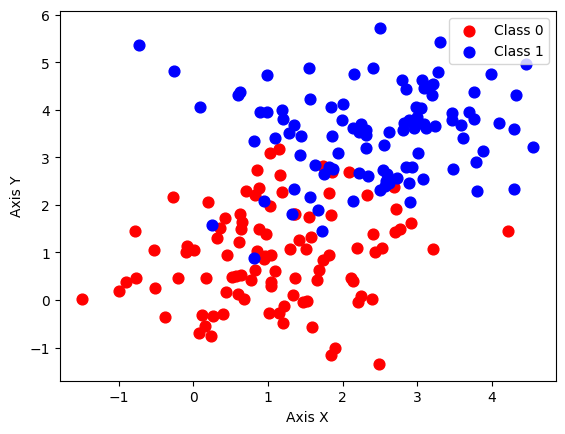

In [67]:
class_0 = data_2d[data_2d['col_1'] == 0]
class_1 = data_2d[data_2d['col_1'] == 1]

plt.scatter( class_0['col_2'], class_0['col_3'], s = 60, c = 'red', label = 'Class 0')
plt.scatter( class_1['col_2'], class_1['col_3'], s = 60, c = 'blue', label = 'Class 1')

plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.legend()

plt.show()

In [72]:
data_2d_clear = data_2d.drop('col_1', axis=1)

In [73]:
data_2d_clear

,col_2,col_3
0,-0.768716,0.460860
1,2.687848,2.366961
2,-0.201379,0.470430
3,0.608496,1.225400
4,-0.082282,1.137218
...,...,...
195,0.629144,4.378584
196,-0.723824,5.361801
197,1.346107,2.333476
198,3.608219,3.411546


**скористайтесь ліктевим методом**

Text(0.5, 0, 'Number of clusters')

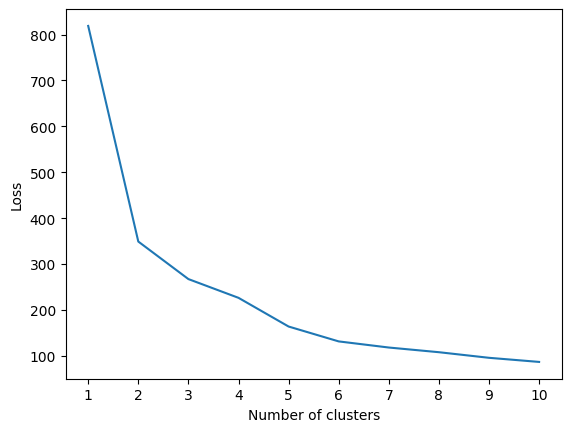

In [74]:
# Using the elbow method to find the optimal number of clusters wcss = [] for i in range(1, 11):
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(data_2d_clear)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(np.arange(1, 11, step=1))
plt.ylabel('Loss')
plt.xlabel('Number of clusters')

**застосуйте алгоритм K-means для кластеризації**

In [75]:
kmeans_2d = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
y_kmeans_2d = kmeans_2d.fit_predict(data_2d_clear)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**​Візуалізуйте результат роботи кластеризації**

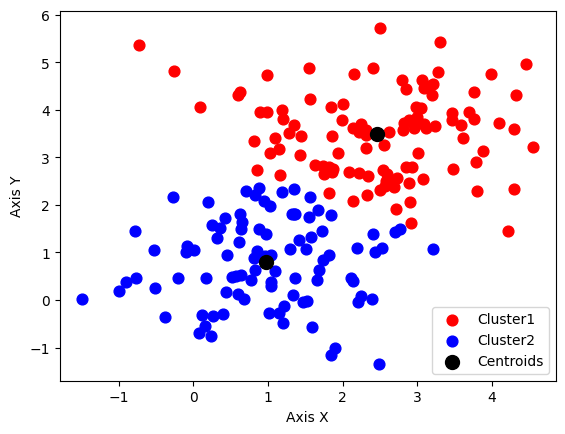

In [79]:
plt.scatter( data_2d_clear.iloc[y_kmeans_2d == 0, 0], data_2d_clear.iloc[y_kmeans_2d == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter( data_2d_clear.iloc[y_kmeans_2d == 1, 0], data_2d_clear.iloc[y_kmeans_2d == 1, 1], s = 60, c = 'blue', label = 'Cluster2')

plt.scatter( kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.legend()

plt.show()

# **MNIST**

**Load & info**

In [10]:
mnist = pd.read_csv('/content/drive/My Drive/DATA homeworks/06/data/mnist.csv')

In [11]:
mnist.shape

(499, 785)

In [12]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 3.0 MB


In [13]:
mnist.describe()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,499.000000,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0,...,499.000000,499.000000,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0
mean,4.372745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.507014,0.256513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.874437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.325835,5.730067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


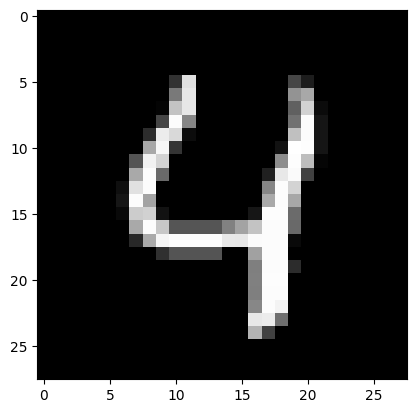

In [15]:
img = mnist.iloc[3].values[1:]
plt.imshow(np.reshape(img, (28, 28)),
           cmap = plt.cm.gray,
           interpolation='nearest',
           clim=(0, 255))

**Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту**

In [16]:
pca = PCA(n_components=2)

In [17]:
mnist_pca = pca.fit_transform(mnist)

In [18]:
mnist_pca

array([[-7.58538278e+01, -1.04350040e+03],
       [-9.69408860e+02, -3.44771686e+02],
       [ 1.05412185e+03, -3.58678152e+02],
       [ 4.20942067e+02,  6.71100405e+02],
       [-1.00283041e+03, -3.02502084e+02],
       [-6.07888710e+01,  4.23325731e+02],
       [-1.72305162e+02,  4.36590769e+02],
       [ 1.82383402e+02,  1.75964222e+02],
       [ 9.31570495e+01,  5.52556706e+02],
       [ 9.50216844e+02, -1.01119979e+03],
       [ 3.58490409e+02, -3.30246758e+02],
       [ 6.13689029e+00,  9.38134303e+02],
       [ 1.08067251e+03, -3.57644654e+02],
       [-1.11596513e+03, -4.11878160e+02],
       [ 1.52753461e+02, -6.37699756e+02],
       [ 4.03687884e+02,  9.30063182e+02],
       [ 4.70336654e+00,  3.84938988e+02],
       [ 1.39588117e+02, -4.57349203e+02],
       [ 5.72696013e+01,  7.67826788e+02],
       [-2.63449049e+02,  3.41674798e+02],
       [ 3.12846739e+02, -1.17427314e+02],
       [-2.16192087e+01,  1.67703195e+02],
       [-8.29236870e+01, -9.91036210e+01],
       [-1.

In [19]:
mnist_pca.shape

(499, 2)

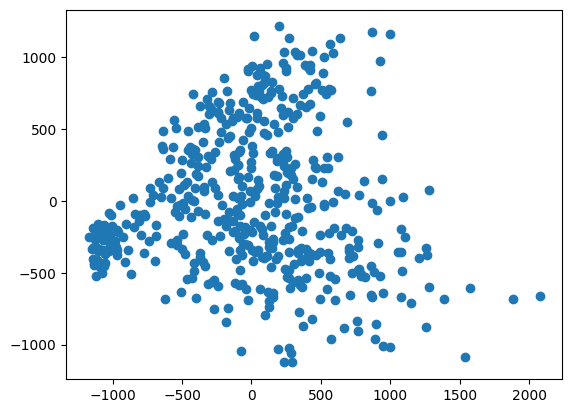

In [20]:
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1])
plt.show()

**скористайтесь ліктевим методом**

Text(0.5, 0, 'Number of clusters')

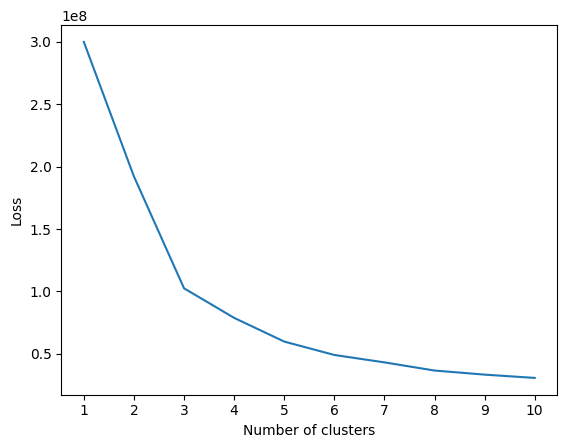

In [21]:
# Using the elbow method to find the optimal number of clusters wcss = [] for i in range(1, 11):
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(mnist_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(np.arange(1, 11, step=1))
plt.ylabel('Loss')
plt.xlabel('Number of clusters')

**застосуйте алгоритм K-means для кластеризації**

In [82]:
kmeans_mnist = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans_mnist = kmeans_mnist.fit_predict(mnist_pca)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**​Візуалізуйте результат роботи кластеризації**

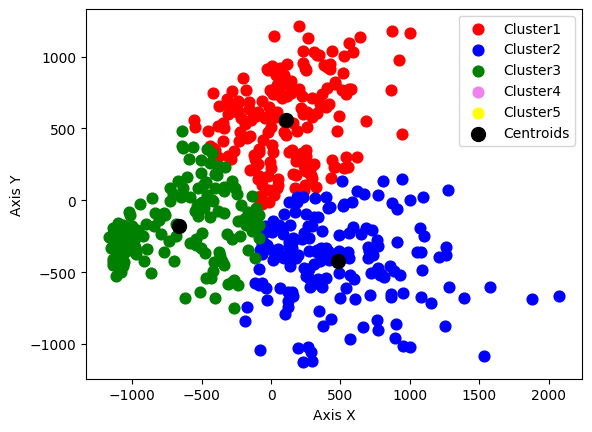

In [81]:
plt.scatter( mnist_pca[y_kmeans_mnist == 0, 0], mnist_pca[y_kmeans_mnist == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter( mnist_pca[y_kmeans_mnist == 1, 0], mnist_pca[y_kmeans_mnist == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( mnist_pca[y_kmeans_mnist == 2, 0], mnist_pca[y_kmeans_mnist == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter( mnist_pca[y_kmeans_mnist == 3, 0], mnist_pca[y_kmeans_mnist == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter( mnist_pca[y_kmeans_mnist == 4, 0], mnist_pca[y_kmeans_mnist == 4, 1], s = 60, c = 'yellow', label = 'Cluster5')
plt.scatter( kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.legend()

plt.show()